### Check http://pixelogik.github.io/NearPy/ for more information

In [1]:
%matplotlib inline

In [2]:
import numpy
import time

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjectionsBias

#from nearpy.hashes import RandomBinaryProjections
#from nearpy.hashes import RandomDiscretizedProjections

from nearpy.filters import NearestFilter, UniqueFilter
from matplotlib import pyplot as plt
from nearpy.distances import EuclideanDistance

In [3]:
# Dimension of our vector space
dimension = 2

# Generate num_of_vectors random vectors
num_of_vectors = 1000
data=numpy.empty([dimension,num_of_vectors])
for index in range(num_of_vectors):
    data[:,index] = numpy.random.randn(dimension)

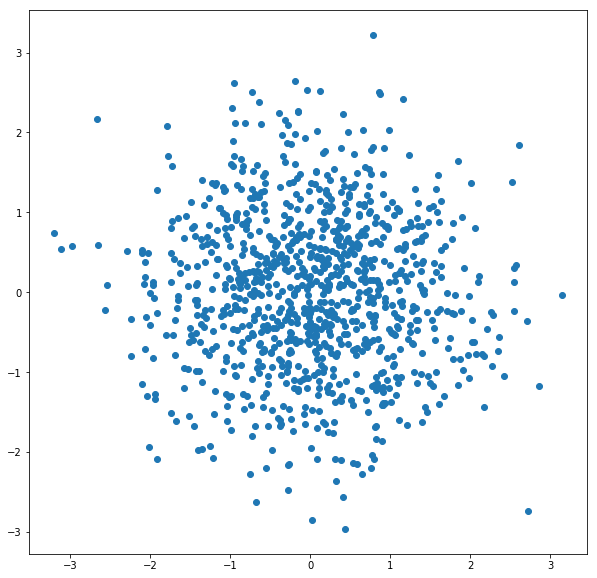

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])


In [5]:
# Create a random binary hash with projection_count bits

projection_count=25 # Each dimension dim vector will be hashed into projection_count bits
bias_bound = 3
rbp = RandomBinaryProjectionsBias('rbp', projection_count,bias_bound)

# Create engine with pipeline configuration
engine = Engine(dimension, lshashes=[rbp],distance=EuclideanDistance())


*** engine init done ***


In [6]:
for iter in range(20): 
    #print(data[:,iter])
    print(rbp.hash_vector(data[:,iter]))


['1101001000000000000000100']
['0010000011011111001010000']
['0010000001010111001000100']
['0010000001000101001000100']
['0010000011011111001010000']
['0010000011010111001010000']
['0010000111111111001010000']
['0010000001010110000010000']
['0000000001010111001000000']
['0010000001010111001000100']
['0010000011011111001110000']
['0000001001000001001000100']
['0010000001010111001000000']
['1101011100000000110001011']
['0010000111111111001010000']
['0010000001010110000010000']
['1000001000000000000000010']
['0010000011010111001010000']
['1101001000000000000000000']
['0010000111111111001010000']


In [7]:
# We are looking for the ten closest neighbours
# nearest = NearestFilter(10)

# We want unique candidates
# unique = UniqueFilter()


In [8]:
#help(RandomDiscretizedProjections)
#help(RandomBinaryProjections)
#help(Engine)

In [9]:
t0 = time.time()

# Index num_of_vectors random vectors (set their data to a unique string)
for index in range(num_of_vectors):
    v = data[:,index]
    engine.store_vector(v, 'data_%d' % index)                    
    
t1 = time.time()
print('Creating the data structure took %f seconds' % (t1-t0))

Creating the data structure took 0.017453 seconds


In [10]:
# Create random query vector
#query = numpy.random.randn(dimension)
query = [-1,-1]
print(query)

[-1, -1]


In [11]:
engine.candidate_count(query)

31

In [12]:
# Get nearest neighbours
N = engine.neighbours(query,distance=EuclideanDistance(),vector_filters=[NearestFilter(200)])
#N = engine.neighbours(query,distance=EuclideanDistance())
len(N)

31

In [13]:
#help(engine.neighbours)

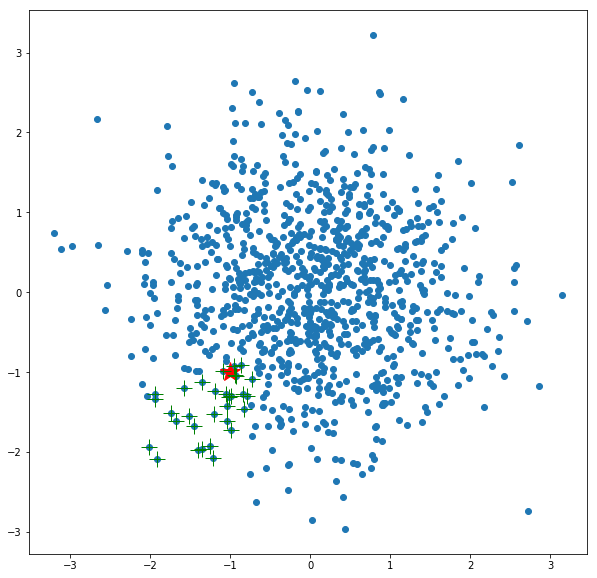

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])

plt.plot(query[0],query[1],'r*', markersize=20)
for iter in range(len(N)):
    #plt.plot(N[iter][0][0],N[iter][0][1],'g*', markersize=16)
    index=int(N[iter][1].split('_')[1])
    plt.plot(data[0,index],data[1,index],'g+', markersize=16)
